# Exercise Session 7

Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# Monte Carlo Preliminaries: Random Number Generation

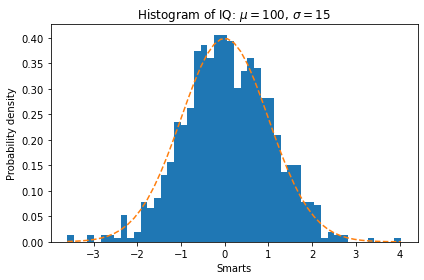

In [3]:
np.random.seed(19680801)

# example data
mu = 0  # mean of distribution
sigma = 1  # standard deviation of distribution
N = 1000
X = mu + sigma * np.random.randn(N)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(X, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Estimate the mean and variance

In [4]:
E = np.mean(X)
E

0.07017365971152839

In [5]:
Var = np.var(X)
Var

1.0068662627324936

# Importance Sampling: 

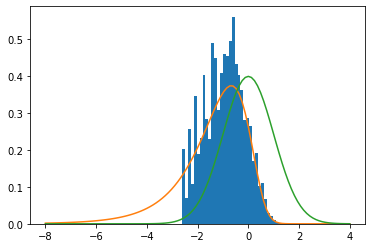

In [6]:
def p(x):
    return np.sqrt(2)/np.sqrt(np.pi*(1+(x-1)**2))*np.exp(-.5*(3+2*np.arcsinh(x-1))**2)

# example data
m = 0  # mean of distribution
s2 = 1  # standard deviation of distribution

def q(x):
    return 1/np.sqrt(2*np.pi*s2)*np.exp(-((x-m)**2)/2/s2)

L = 1000 # number of samples
x = np.random.normal(size=L)*np.sqrt(s2)+m #draw from proposal
w = p(x)/q(x) # compute weights

plt.hist(x, weights=w, bins=50, density=True)
# plot the target distribution and the proposal
xv = np.linspace(-8,4,100)
plt.plot(xv,p(xv))
plt.plot(xv,q(xv))

We see that the approximation that we have made is quite bad. This is due
to the proposal distribution being lower than the target in the lower end of
the distribution.

## Lets increase the no of samples

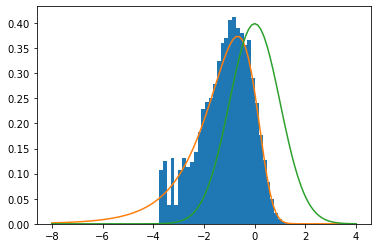

In [7]:
L = 10000 # number of samples
x = np.random.normal(size=L)*np.sqrt(s2)+m #draw from proposal
w = p(x)/q(x) # compute weights

plt.hist(x, weights=w, bins=50, density=True)
# plot the target distribution and the proposal
xv = np.linspace(-8,4,100)
plt.plot(xv,p(xv))
plt.plot(xv,q(xv))

We see that it still struggles to sample from the target in the lower end.
Now i will use a proposal with a lower mean and higher variance to improve it.

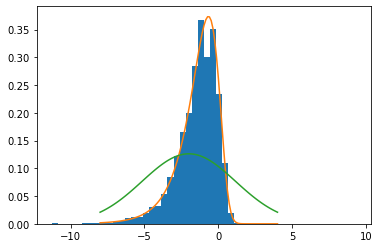

In [8]:
# example data
m = -2  # mean of distribution
s2 = 10  # standard deviation of distribution

L = 1000 # number of samples
x = np.random.normal(size=L)*np.sqrt(s2)+m #draw from proposal
w = p(x)/q(x) # compute weights

plt.hist(x, weights=w, bins=50, density=True)
# plot the target distribution and the proposal
xv = np.linspace(-8,4,100)
plt.plot(xv,p(xv))
plt.plot(xv,q(xv))

## Estimate mean and variance

In [9]:
# Estimate mean and variance
est_mean = np.sum(x*w)/L
est_var = np.sum(w*(est_mean-x)**2)/L
est_mean

-1.4693916834957377

In [10]:
est_var

1.982721781922873

## Uniform Proposal

# Gibbs Sampling

## First Markov Chain

We want

$$
x[k + 1] = 0.9x[k] + v[k]
$$

This is a markov chain since it satisfies the markov assumption.

### b) Start in $x[1] = 5$ and simulate for $k = 2, 3, \dots, 300$

In [11]:
K = 300
x = np.zeros(K)
x[0] = 5
for k in range(K-1):
    x[k+1] = 0.9*x[k] + np.random.normal()*np.sqrt(0.19)

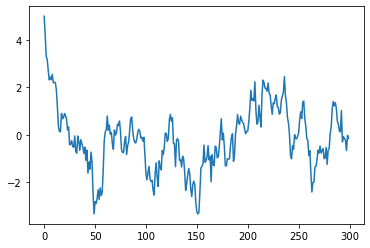

In [12]:
plt.plot(x)

## Prove that the stationary distribution is $N(0, 1)$

Blæh

# Exercise 7.5 Gibbs sampler for a directed graph with discrete vars

$$
P(A) = 0.1 
$$

$$
p(B|A) = 0.7
$$

$$
p(B|\bar{A}) = 0.1
$$

implement the gibs sampler for $P(A, B)$:

1. Sample $A[k] \sim p(A|B[k-1])$
2. Sample $B[k] \sim p(B|A[k])$


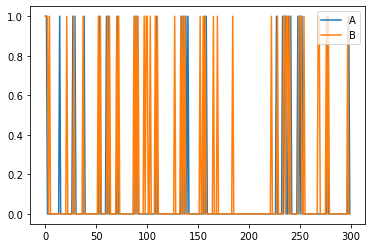

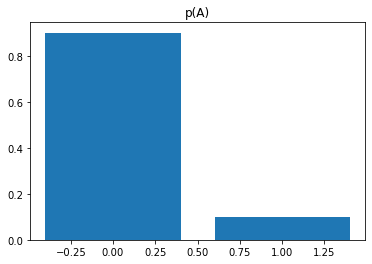

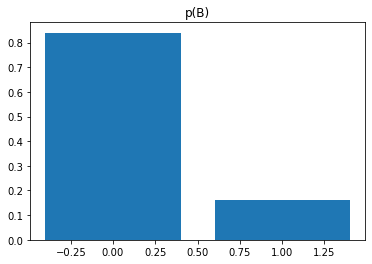

In [13]:
K = 300

A = np.zeros(K)
B = np.zeros(K)
A[0] = 1
B[0] = 1

for k in range(K-1):
    # Sample A|B
    if B[k] == 0:
        A[k+1] = np.random.binomial(1, 0.03/0.84)
    else:
        A[k+1] = np.random.binomial(1, 0.07/0.16)

    # Sample B|A
    if A[k] == 0:
        B[k+1] = np.random.binomial(1, 0.1)
    else:
        B[k+1] = np.random.binomial(1, 0.7)

plt.plot(A,label='A')
plt.plot(B,label='B')
plt.legend(loc='upper right')
plt.show()

plt.bar(x=(0,1),height=(sum(1-A)/K,sum(A)/K))
plt.title('p(A)')
plt.show()

plt.bar(x=(0,1),height=(sum(1-B)/K,sum(B)/K))
plt.title('p(B)')
plt.show()

# Exercise 7.3

Bayesian Linear Regression with scalar $x_i$ and $y_i$

$$
y_i = wx_i + e_i, \qquad e_i \sim N(0, \sigma^2)
$$

With unknown $w$ (scalar) and $\sigma^2$ (scalar) can be formulated using the
Normal-Inverse-Gamma distribution.

In [14]:
N = 100
X = np.random.normal(size=N)
y = -3*X + np.random.normal(size=N)*2

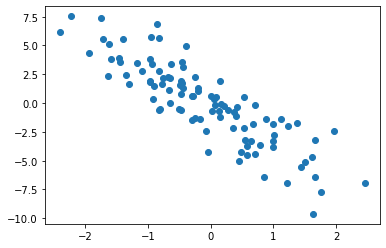

In [15]:
plt.scatter(X, y)

The true $w = 3$ and the true $\sigma^2 = 2$

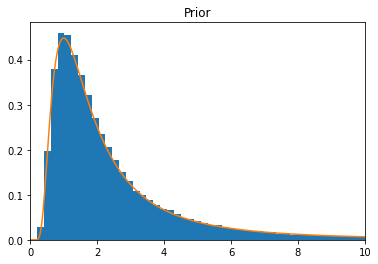

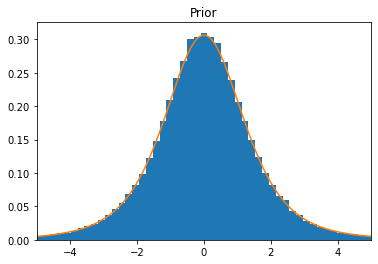

<ipython-input-35-c92b85ce089e>:40: RuntimeWarning: overflow encountered in power
  weightis = 1/np.sqrt(2*np.pi*s2is)**N*np.exp(-1/(2*s2is)*np.sum((X[:,np.newaxis]*wis[np.newaxis ,:]-y


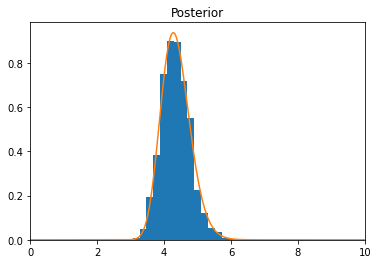

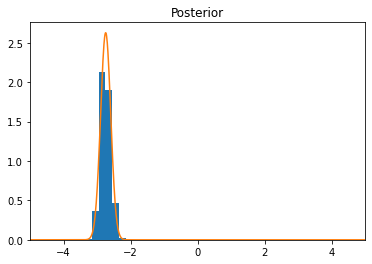

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgamma , t

m = 0
l = 1
b = 3
a = 2

N = 200
w0 = -3
X = np.random.normal(size=N)
y = X*w0 + np.random.normal(size=N)*2

# Analytical solution
s2v = np.linspace(0,10,1000)
wv = np.linspace(-5,5,1000)
mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2))
lpost = l + np.sum(X**2)
apost = a + N/2
bpost = b+.5*(np.sum(y**2)+m**2*l-(m*l+np.sum(X*y))**2/(l+np.sum(X**2)))

# Importance sampling
L = 100000

s2is = invgamma.rvs(size=L,a=a,scale=b)
plt.hist(s2is,density=True,bins=np.linspace(0,10,50))
plt.plot(s2v,invgamma.pdf(x=s2v,a=a,scale=b))
plt.xlim((0,10))
plt.title('Prior')
plt.show()

wis = np.random.normal(size=L)*np.sqrt(s2is/l)+m
plt.hist(wis,density=True,bins=np.linspace(-5,5,50))
plt.plot(wv,t.pdf(x=wv,df=2*a,loc=m,scale=np.sqrt(b/(a*l))))
plt.xlim((-5,5))
plt.title('Prior')
plt.show()

weightis = 1/np.sqrt(2*np.pi*s2is)**N*np.exp(-1/(2*s2is)*np.sum((X[:,np.newaxis]*wis[np.newaxis ,:]-y
[:,np.newaxis])**2,axis=0))

plt.hist(s2is,density=True,bins=np.linspace(0,10,50),weights=weightis)
plt.plot(s2v,invgamma.pdf(x=s2v,a=apost,scale=bpost))
plt.xlim((0,10))
plt.title('Posterior')
plt.show()
plt.hist(wis,density=True,bins=np.linspace(-5,5,50),weights=weightis)
plt.plot(wv,t.pdf(x=wv,df=2*apost,loc=mpost,scale=np.sqrt(bpost/(lpost*apost))))
plt.xlim((-5,5))
plt.title('Posterior')
plt.show()

## Bayesian Linear Regression as a bayesian network